In [15]:
#first we must import the libraries that we want to use
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [16]:
movie_budgets_df = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')   #Michael has expertise on this dataframe from The Numbers
movie_studios = pd.read_csv('zippedData/bom.movie_gross.csv.gz')       #Teigen's has expertise on this dataframe from Box Office Mojo
title_basics = pd.read_csv('zippedData/imdb.title.basics.csv.gz')      #Louis' has expertise on this dataframe from IMDB
title_ratings = pd.read_csv('zippedData/imdb.title.ratings.csv.gz')    #as well as this one 
title_principal=pd.read_csv('zippedData/imdb.title.principals.csv.gz') #as well as this one
name_basics=pd.read_csv('zippedData/imdb.name.basics.csv.gz')          #as well as this one
tmdb = pd.read_csv('zippedData/tmdb.movies.csv.gz')                    #Ely has expertise on this dataframe

# Now that we have loaded all of our raw data, let's merge it together!

In [17]:
#firstly, the tmbd database has it's genre's encoded so we must decode the genre's using the below dictionary
genres={'28':"Action",
'12':"Adventure",
'16':"Animation",
'35':"Comedy",
'80':"Crime",
'99':"Documentary",
'18':"Drama",
'10751':"Family",
'14':"Fantasy",
'36':"History",
'27':"Horror",
'10402':"Music",
'9648':"Mystery",
'10749':"Romance",
'878':"Science Fiction",
'10770':"TV Movie",
'53':"Thriller",
'10752':"War",
'37':"Western"}

tmdb = tmdb.replace(pd.Series(genres).astype(str), regex=True)
tmdb['genre_ids']=tmdb['genre_ids'].str.strip('[]').str.split(', ')

In [19]:
tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [20]:
tmdb.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[Adventure, Fantasy, Family]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[Fantasy, Adventure, Animation, Family]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[Adventure, Action, Science Fiction]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[Animation, Comedy, Family]",862,en,Toy Story,28.005,1Documentary5-11-22,Toy Story,7.9,10174
4,4,"[Action, Science Fiction, Adventure]",27205,en,Inception,27.920,2010-07-Animation,Inception,8.3,22186


In [21]:
#secondly, we must merge the IMDB title basics and title ratings
title_master = title_basics.merge(title_ratings, how='inner')

In [12]:
title_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 5.1+ MB


In [22]:
title_master.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [23]:
#thirdly, we must merge the tmdb database with the imdb database. we chose to do an inner merge, here because we 
#are only interested in the movies that these dataframes have in common
tmdb_and_imdb = tmdb.merge(title_master, how = 'inner')

In [24]:
tmdb_and_imdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17805 entries, 0 to 17804
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         17805 non-null  int64  
 1   genre_ids          17805 non-null  object 
 2   id                 17805 non-null  int64  
 3   original_language  17805 non-null  object 
 4   original_title     17805 non-null  object 
 5   popularity         17805 non-null  float64
 6   release_date       17805 non-null  object 
 7   title              17805 non-null  object 
 8   vote_average       17805 non-null  float64
 9   vote_count         17805 non-null  int64  
 10  tconst             17805 non-null  object 
 11  primary_title      17805 non-null  object 
 12  start_year         17805 non-null  int64  
 13  runtime_minutes    17308 non-null  float64
 14  genres             17745 non-null  object 
 15  averagerating      17805 non-null  float64
 16  numvotes           178

In [25]:
tmdb_and_imdb.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,tconst,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,0,"[Adventure, Fantasy, Family]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,tt0926084,Harry Potter and the Deathly Hallows: Part 1,2010,146.0,"Adventure,Fantasy,Mystery",7.7,425530
1,1,"[Fantasy, Adventure, Animation, Family]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,tt0892769,How to Train Your Dragon,2010,98.0,"Action,Adventure,Animation",8.1,611299
2,2,"[Adventure, Action, Science Fiction]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,tt1228705,Iron Man 2,2010,124.0,"Action,Adventure,Sci-Fi",7.0,657690
3,4,"[Action, Science Fiction, Adventure]",27205,en,Inception,27.920,2010-07-Animation,Inception,8.3,22186,tt1375666,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066
4,5,"[Adventure, Fantasy, Family]",32657,en,Percy Jackson & the Olympians: The Lightning T...,26.691,2010-02-11,Percy Jackson & the Olympians: The Lightning T...,6.1,4229,tt0814255,Percy Jackson & the Olympians: The Lightning T...,2010,118.0,"Adventure,Family,Fantasy",5.9,165108


In [28]:
#the next dataframe we want to fold in has the column "movie" but we want to rename it to title so the merge can 
#happen on the title of the film, so we must rename the column
movie_budgets_df = movie_budgets_df.rename(columns={'movie':'title'})

In [29]:
#now we want to merge the financial dataframe from The Numbers with all the others based on title, so we specify that 
#with the on = 'title'
master_unclean = tmdb_and_imdb.merge(movie_budgets_df, on = 'title', how = 'inner')


In [34]:
#let's take a look at the amount of information we have now and the types of information in our columns
#we can see where we have duplicate columns, we now have x and y versions to distinguish them from each other
#runtime_minutes and genres are the only two columns that has missing value
master_unclean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2955 entries, 0 to 2954
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         2955 non-null   int64  
 1   genre_ids          2955 non-null   object 
 2   id_x               2955 non-null   int64  
 3   original_language  2955 non-null   object 
 4   original_title     2955 non-null   object 
 5   popularity         2955 non-null   float64
 6   release_date_x     2955 non-null   object 
 7   title              2955 non-null   object 
 8   vote_average       2955 non-null   float64
 9   vote_count         2955 non-null   int64  
 10  tconst             2955 non-null   object 
 11  primary_title      2955 non-null   object 
 12  start_year         2955 non-null   int64  
 13  runtime_minutes    2860 non-null   float64
 14  genres             2948 non-null   object 
 15  averagerating      2955 non-null   float64
 16  numvotes           2955 

In [35]:
#now we want to exclude movies from this master dataframe which are less than half an hour and more than three 
#hours, because we want to base our recommendations on films that are typically seen in the movie theater, no 
#short film stand alones, and no art-film style epics, and put that information on a new dataframe called run_time
filtered_run_time = master_unclean.loc[(master_unclean['runtime_minutes'] > 30) & (master_unclean['runtime_minutes'] < 180)]
filtered_run_time

,Unnamed: 0,genre_ids,id_x,original_language,original_title,popularity,release_date_x,title,vote_average,vote_count,...,start_year,runtime_minutes,genres,averagerating,numvotes,id_y,release_date_y,production_budget,domestic_gross,worldwide_gross
0,1,"[Fantasy, Adventure, Animation, Family]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,...,2010,98.0,"Action,Adventure,Animation",8.1,611299,30,"Mar 26, 2010","$165,000,000","$217,581,232","$494,870,992"
1,2,"[Adventure, Action, Science Fiction]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,...,2010,124.0,"Action,Adventure,Sci-Fi",7.0,657690,15,"May 7, 2010","$170,000,000","$312,433,331","$621,156,389"
2,4,"[Action, Science Fiction, Adventure]",27205,en,Inception,27.920,2010-07-Animation,Inception,8.3,22186,...,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066,38,"Jul 16, 2010","$160,000,000","$292,576,195","$835,524,642"
3,5,"[Adventure, Fantasy, Family]",32657,en,Percy Jackson & the Olympians: The Lightning T...,26.691,2010-02-11,Percy Jackson & the Olympians: The Lightning T...,6.1,4229,...,2010,118.0,"Adventure,Family,Fantasy",5.9,165108,17,"Feb 12, 2010","$95,000,000","$88,768,303","$223,050,874"
4,7,"[Animation, Family, Comedy]",10193,en,Toy Story 3,24.445,2010-06-17,Toy Story 3,7.7,8340,...,2010,103.0,"Adventure,Animation,Comedy",8.3,682218,47,"Jun 18, 2010","$200,000,000","$415,004,880","$1,068,879,522"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2950,25825,"[Action, Science Fiction]",448764,en,Molly,1.400,20Drama-09-25,Molly,5.8,5,...,2017,91.0,"Action,Sci-Fi",4.6,726,81,"Oct 22, 1999","$21,000,000","$17,396","$17,396"
2951,26040,[],509314,en,The Box,0.840,20Drama-03-04,The Box,8.0,1,...,2011,89.0,Drama,6.3,51,66,"Nov 6, 2009","$25,000,000","$15,051,977","$34,356,760"
2952,26211,[Thriller],565736,en,The Box,0.600,20Drama-05-21,The Box,10.0,1,...,2011,89.0,Drama,6.3,51,66,"Nov 6, 2009","$25,000,000","$15,051,977","$34,356,760"
2953,26323,[],509316,en,The Box,0.600,20Drama-03-04,The Box,8.0,1,...,2011,89.0,Drama,6.3,51,66,"Nov 6, 2009","$25,000,000","$15,051,977","$34,356,760"


In [36]:
#let's take a look at the column names that are redundant
filtered_run_time.columns

Index(['Unnamed: 0', 'genre_ids', 'id_x', 'original_language',
       'original_title', 'popularity', 'release_date_x', 'title',
       'vote_average', 'vote_count', 'tconst', 'primary_title', 'start_year',
       'runtime_minutes', 'genres', 'averagerating', 'numvotes', 'id_y',
       'release_date_y', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')

In [37]:
#here, we want to drop some columns where the information is irrelivant or duplicated 
filtered_less_columns = filtered_run_time.drop(['Unnamed: 0', 'id_x', 'original_title', 'tconst', 'start_year', 'id_y',\
                                    'genres', 'release_date_x', 'primary_title', 'original_language'], axis = 1)

In [38]:
#let's take a look at where our dataframe is right now
filtered_less_columns

,genre_ids,popularity,title,vote_average,vote_count,runtime_minutes,averagerating,numvotes,release_date_y,production_budget,domestic_gross,worldwide_gross
0,"[Fantasy, Adventure, Animation, Family]",28.734,How to Train Your Dragon,7.7,7610,98.0,8.1,611299,"Mar 26, 2010","$165,000,000","$217,581,232","$494,870,992"
1,"[Adventure, Action, Science Fiction]",28.515,Iron Man 2,6.8,12368,124.0,7.0,657690,"May 7, 2010","$170,000,000","$312,433,331","$621,156,389"
2,"[Action, Science Fiction, Adventure]",27.920,Inception,8.3,22186,148.0,8.8,1841066,"Jul 16, 2010","$160,000,000","$292,576,195","$835,524,642"
3,"[Adventure, Fantasy, Family]",26.691,Percy Jackson & the Olympians: The Lightning T...,6.1,4229,118.0,5.9,165108,"Feb 12, 2010","$95,000,000","$88,768,303","$223,050,874"
4,"[Animation, Family, Comedy]",24.445,Toy Story 3,7.7,8340,103.0,8.3,682218,"Jun 18, 2010","$200,000,000","$415,004,880","$1,068,879,522"
...,...,...,...,...,...,...,...,...,...,...,...,...
2950,"[Action, Science Fiction]",1.400,Molly,5.8,5,91.0,4.6,726,"Oct 22, 1999","$21,000,000","$17,396","$17,396"
2951,[],0.840,The Box,8.0,1,89.0,6.3,51,"Nov 6, 2009","$25,000,000","$15,051,977","$34,356,760"
2952,[Thriller],0.600,The Box,10.0,1,89.0,6.3,51,"Nov 6, 2009","$25,000,000","$15,051,977","$34,356,760"
2953,[],0.600,The Box,8.0,1,89.0,6.3,51,"Nov 6, 2009","$25,000,000","$15,051,977","$34,356,760"


In [42]:
#add a "year" column and a 'month' column to our dataframe 
import datetime

In [47]:
filtered_less_columns['year']=pd.to_datetime(filtered_less_columns['release_date_y']).dt.year

In [48]:
filtered_less_columns['month']=pd.to_datetime(filtered_less_columns['release_date_y']).dt.month

In [49]:
filtered_less_columns

,genre_ids,popularity,title,vote_average,vote_count,runtime_minutes,averagerating,numvotes,release_date_y,production_budget,domestic_gross,worldwide_gross,year,month
0,"[Fantasy, Adventure, Animation, Family]",28.734,How to Train Your Dragon,7.7,7610,98.0,8.1,611299,"Mar 26, 2010","$165,000,000","$217,581,232","$494,870,992",2010,3
1,"[Adventure, Action, Science Fiction]",28.515,Iron Man 2,6.8,12368,124.0,7.0,657690,"May 7, 2010","$170,000,000","$312,433,331","$621,156,389",2010,5
2,"[Action, Science Fiction, Adventure]",27.920,Inception,8.3,22186,148.0,8.8,1841066,"Jul 16, 2010","$160,000,000","$292,576,195","$835,524,642",2010,7
3,"[Adventure, Fantasy, Family]",26.691,Percy Jackson & the Olympians: The Lightning T...,6.1,4229,118.0,5.9,165108,"Feb 12, 2010","$95,000,000","$88,768,303","$223,050,874",2010,2
4,"[Animation, Family, Comedy]",24.445,Toy Story 3,7.7,8340,103.0,8.3,682218,"Jun 18, 2010","$200,000,000","$415,004,880","$1,068,879,522",2010,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2950,"[Action, Science Fiction]",1.400,Molly,5.8,5,91.0,4.6,726,"Oct 22, 1999","$21,000,000","$17,396","$17,396",1999,10
2951,[],0.840,The Box,8.0,1,89.0,6.3,51,"Nov 6, 2009","$25,000,000","$15,051,977","$34,356,760",2009,11
2952,[Thriller],0.600,The Box,10.0,1,89.0,6.3,51,"Nov 6, 2009","$25,000,000","$15,051,977","$34,356,760",2009,11
2953,[],0.600,The Box,8.0,1,89.0,6.3,51,"Nov 6, 2009","$25,000,000","$15,051,977","$34,356,760",2009,11


In [50]:
#because we want our recommendations to be relevent to the current market, we only want to look at movies from the 
#last few years, so let's filter those out
filtered_year=filtered_less_columns.loc[filtered_less_columns['year'] >= 2010]

In [51]:
#let's take a look at what we have at this point
filtered_year

,genre_ids,popularity,title,vote_average,vote_count,runtime_minutes,averagerating,numvotes,release_date_y,production_budget,domestic_gross,worldwide_gross,year,month
0,"[Fantasy, Adventure, Animation, Family]",28.734,How to Train Your Dragon,7.7,7610,98.0,8.1,611299,"Mar 26, 2010","$165,000,000","$217,581,232","$494,870,992",2010,3
1,"[Adventure, Action, Science Fiction]",28.515,Iron Man 2,6.8,12368,124.0,7.0,657690,"May 7, 2010","$170,000,000","$312,433,331","$621,156,389",2010,5
2,"[Action, Science Fiction, Adventure]",27.920,Inception,8.3,22186,148.0,8.8,1841066,"Jul 16, 2010","$160,000,000","$292,576,195","$835,524,642",2010,7
3,"[Adventure, Fantasy, Family]",26.691,Percy Jackson & the Olympians: The Lightning T...,6.1,4229,118.0,5.9,165108,"Feb 12, 2010","$95,000,000","$88,768,303","$223,050,874",2010,2
4,"[Animation, Family, Comedy]",24.445,Toy Story 3,7.7,8340,103.0,8.3,682218,"Jun 18, 2010","$200,000,000","$415,004,880","$1,068,879,522",2010,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2943,"[Action, Adventure, Animation]",2.707,Bilal: A New Breed of Hero,6.8,54,105.0,8.0,16854,"Feb 2, 2018","$30,000,000","$490,973","$648,599",2018,2
2946,"[Horror, Mystery, Thriller]",1.816,3,6.0,2,119.0,6.7,4722,"Sep 16, 2011","$7,200,000","$59,774","$295,492",2011,9
2947,"[Horror, Mystery, Thriller]",1.816,3,6.0,2,145.0,7.2,3471,"Sep 16, 2011","$7,200,000","$59,774","$295,492",2011,9
2948,"[Horror, Mystery, Thriller]",1.816,3,6.0,2,115.0,6.1,101,"Sep 16, 2011","$7,200,000","$59,774","$295,492",2011,9


In [53]:
#now we must clean up this financial information by removing punctuation and making sure that these numbers are 
#integers and therefore we will be able to perform mathmatical manipulation on them in the future 
filtered_year['production_budget'] = filtered_year['production_budget'].str.replace(',', '')
filtered_year['production_budget'] = filtered_year['production_budget'].str.replace('$', '')
filtered_year['production_budget'] = filtered_year['production_budget'].astype(int)
filtered_year['domestic_gross'] = filtered_year['domestic_gross'].str.replace(',', '').str.replace('$', '')
filtered_year['domestic_gross'] = filtered_year['domestic_gross'].astype(int)
filtered_year['worldwide_gross'] = filtered_year['worldwide_gross'].str.replace(',', '').str.replace('$', '')
filtered_year['worldwide_gross'] = filtered_year['worldwide_gross'].astype(int)
filtered_year['total_gross'] = filtered_year['domestic_gross'] + filtered_year['worldwide_gross']
filtered_year['ROI'] = (filtered_year['total_gross'] / filtered_year['production_budget']) * 100

<ipython-input-53-f99886e2eb9c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_year['production_budget'] = filtered_year['production_budget'].str.replace(',', '')
<ipython-input-53-f99886e2eb9c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_year['production_budget'] = filtered_year['production_budget'].str.replace('$', '')
<ipython-input-53-f99886e2eb9c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

In [54]:
#now let's make a Return on Investment column, using the fincial data we just cleaned
filtered_year['ROI'] = (filtered_year['total_gross'] / filtered_year['production_budget']) * 100

<ipython-input-54-521bb0bafb84>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_year['ROI'] = (filtered_year['total_gross'] / filtered_year['production_budget']) * 100


In [55]:
filtered_year

,genre_ids,popularity,title,vote_average,vote_count,runtime_minutes,averagerating,numvotes,release_date_y,production_budget,domestic_gross,worldwide_gross,year,month,total_gross,ROI
0,"[Fantasy, Adventure, Animation, Family]",28.734,How to Train Your Dragon,7.7,7610,98.0,8.1,611299,"Mar 26, 2010",165000000,217581232,494870992,2010,3,712452224,431.789227
1,"[Adventure, Action, Science Fiction]",28.515,Iron Man 2,6.8,12368,124.0,7.0,657690,"May 7, 2010",170000000,312433331,621156389,2010,5,933589720,549.170424
2,"[Action, Science Fiction, Adventure]",27.920,Inception,8.3,22186,148.0,8.8,1841066,"Jul 16, 2010",160000000,292576195,835524642,2010,7,1128100837,705.063023
3,"[Adventure, Fantasy, Family]",26.691,Percy Jackson & the Olympians: The Lightning T...,6.1,4229,118.0,5.9,165108,"Feb 12, 2010",95000000,88768303,223050874,2010,2,311819177,328.230713
4,"[Animation, Family, Comedy]",24.445,Toy Story 3,7.7,8340,103.0,8.3,682218,"Jun 18, 2010",200000000,415004880,1068879522,2010,6,1483884402,741.942201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2943,"[Action, Adventure, Animation]",2.707,Bilal: A New Breed of Hero,6.8,54,105.0,8.0,16854,"Feb 2, 2018",30000000,490973,648599,2018,2,1139572,3.798573
2946,"[Horror, Mystery, Thriller]",1.816,3,6.0,2,119.0,6.7,4722,"Sep 16, 2011",7200000,59774,295492,2011,9,355266,4.934250
2947,"[Horror, Mystery, Thriller]",1.816,3,6.0,2,145.0,7.2,3471,"Sep 16, 2011",7200000,59774,295492,2011,9,355266,4.934250
2948,"[Horror, Mystery, Thriller]",1.816,3,6.0,2,115.0,6.1,101,"Sep 16, 2011",7200000,59774,295492,2011,9,355266,4.934250


# Now that we have cleaned data, let's analyze it a bit so we can provide recommendations

# This is where we analyze genres

In [56]:
#To explore the trends by genre, first we must "explode" the genre_ids so that each film is listed once for each of 
#the genres it is in 
exploded = filtered_year.explode('genre_ids', ignore_index=False)

In [57]:
#let's reset our index for this genre data so that we can use iloc should we need to
exploded.reset_index()

,index,genre_ids,popularity,title,vote_average,vote_count,runtime_minutes,averagerating,numvotes,release_date_y,production_budget,domestic_gross,worldwide_gross,year,month,total_gross,ROI
0,0,Fantasy,28.734,How to Train Your Dragon,7.7,7610,98.0,8.1,611299,"Mar 26, 2010",165000000,217581232,494870992,2010,3,712452224,431.789227
1,0,Adventure,28.734,How to Train Your Dragon,7.7,7610,98.0,8.1,611299,"Mar 26, 2010",165000000,217581232,494870992,2010,3,712452224,431.789227
2,0,Animation,28.734,How to Train Your Dragon,7.7,7610,98.0,8.1,611299,"Mar 26, 2010",165000000,217581232,494870992,2010,3,712452224,431.789227
3,0,Family,28.734,How to Train Your Dragon,7.7,7610,98.0,8.1,611299,"Mar 26, 2010",165000000,217581232,494870992,2010,3,712452224,431.789227
4,1,Adventure,28.515,Iron Man 2,6.8,12368,124.0,7.0,657690,"May 7, 2010",170000000,312433331,621156389,2010,5,933589720,549.170424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5682,2948,Mystery,1.816,3,6.0,2,115.0,6.1,101,"Sep 16, 2011",7200000,59774,295492,2011,9,355266,4.934250
5683,2948,Thriller,1.816,3,6.0,2,115.0,6.1,101,"Sep 16, 2011",7200000,59774,295492,2011,9,355266,4.934250
5684,2949,Horror,1.816,3,6.0,2,80.0,3.9,166,"Sep 16, 2011",7200000,59774,295492,2011,9,355266,4.934250
5685,2949,Mystery,1.816,3,6.0,2,80.0,3.9,166,"Sep 16, 2011",7200000,59774,295492,2011,9,355266,4.934250


In [58]:
#let's also assign this month column to "month" so we can call upon this series later
month = exploded['month']

In [60]:
exploded.columns

Index(['genre_ids', 'popularity', 'title', 'vote_average', 'vote_count',
       'runtime_minutes', 'averagerating', 'numvotes', 'release_date_y',
       'production_budget', 'domestic_gross', 'worldwide_gross', 'year',
       'month', 'total_gross', 'ROI'],
      dtype='object')

In [61]:
#let's make a dataframe which only has the month, the genre, the ROI, and the title, for ease of use
month_genre_roi_title = exploded.drop(['release_date_y', 'popularity', 'vote_average', 'vote_count',\
                                      'runtime_minutes', 'averagerating', 'numvotes', \
                                      'production_budget', 'domestic_gross', 'worldwide_gross',\
                                      'total_gross'], axis=1)

In [62]:
#this is much eaiser to look at and figure out what is happening
month_genre_roi_title

,genre_ids,title,year,month,ROI
0,Fantasy,How to Train Your Dragon,2010,3,431.789227
0,Adventure,How to Train Your Dragon,2010,3,431.789227
0,Animation,How to Train Your Dragon,2010,3,431.789227
0,Family,How to Train Your Dragon,2010,3,431.789227
1,Adventure,Iron Man 2,2010,5,549.170424
...,...,...,...,...,...
2948,Mystery,3,2011,9,4.934250
2948,Thriller,3,2011,9,4.934250
2949,Horror,3,2011,9,4.934250
2949,Mystery,3,2011,9,4.934250


In [63]:
#let's make a new dataframe where it is clear what the mean Return on Investment is for each genre
genre_roi = month_genre_roi_title.groupby(['genre_ids']).mean().sort_values('ROI', ascending=False)
genre_roi

,year,month,ROI
genre_ids,,,
Horror,2014.268882,6.362538,1262.137396
Thriller,2014.001488,6.837798,710.039344
Romance,2013.442804,6.719557,686.994579
Mystery,2014.000000,7.080000,648.983450
Fantasy,2014.319820,6.752252,612.421109
Animation,2014.346457,7.307087,579.314389
Comedy,2013.829305,6.818731,536.467224
Drama,2014.149306,7.282986,508.626425
Family,2013.976415,7.084906,483.200243


In [64]:
#what are the genres with the top five largest means for Return on Investment? 
top_5_genres=list(genre_roi.index[0:5])
top_5_genres

['Horror', 'Thriller', 'Romance', 'Mystery', 'Fantasy']

In [65]:
#updating the dataframe to only include movies in the top 5 genres
month_genre_roi_title=month_genre_roi_title[month_genre_roi_title['genre_ids'].isin(top_5_genres)]

In [82]:
month_genre_roi_title.sort_values(by='ROI')

,genre_ids,title,year,month,ROI
231,Thriller,Icarus,2010,2,0.000000
1596,Horror,Her Cry: La Llorona Investigation,2013,10,0.000000
1056,Mystery,After,2012,12,0.000000
1594,Romance,Dry Spell,2014,12,0.000000
1593,Horror,Bleeding Hearts,2015,2,0.000000
...,...,...,...,...,...
420,Thriller,Insidious,2011,4,10258.669067
1071,Thriller,The Devil Inside,2012,1,15502.243500
1071,Horror,The Devil Inside,2012,1,15502.243500
2119,Thriller,The Gallows,2015,7,64420.884000


In [67]:
#for each genre, find mean ROI month by month
mean_roi_by_month = month_genre_roi_title.groupby(['month','genre_ids']).mean()

In [68]:
mean_roi_by_month

year          ROI
month genre_ids                          
1     Fantasy    2015.466667  3031.587921
      Horror     2014.756757  2326.510512
      Mystery    2015.000000   863.517970
      Romance    2014.470588  2778.134529
      Thriller   2014.679245  1484.681271
2     Fantasy    2014.933333   494.423697
      Horror     2014.478261   738.517758
      Mystery    2013.923077  1171.765776
      Romance    2013.750000   434.029557
      Thriller   2013.634146   645.952342
3     Fantasy    2014.187500   505.491394
      Horror     2014.952381   606.294990
      Mystery    2014.529412   386.370561
      Romance    2013.888889   387.997976
      Thriller   2014.437500   376.222325
4     Fantasy    2014.000000   365.853312
      Horror     2014.944444  1787.944932
      Mystery    2013.666667   680.083678
      Romance    2013.388889   356.180929
      Thriller   2014.346667   985.029737
5     Fantasy    2013.421053   300.608688
      Horror     2014.181818   689.021948
      Mystery    2015.200000   119.745523
      Romance    2012.952381   593.899116
      Thriller   2014.225806   415.313737
6     Fantasy    2014.333333   715.672610
      Horror     2014.642857   674.680060
      Mystery    2015.222222   596.160235
      Romance    2013.357143   665.262009
      Thriller   2014.500000   500.853122
7     Fantasy    2013.800000   668.453873
      Horror     2014.250000  4052.801697
      Mystery    2014.818182   757.047379
      Romance    2012.583333   757.803302
      Thriller   2013.885714  2391.581187
8     Fantasy    2013.727273   412.320348
      Horror     2013.296296   786.606903
      Mystery    2014.052632  1078.706488
      Romance    2012.925926   820.825188
      Thriller   2013.265625   585.678126
9     Fantasy    2015.000000   281.028857
      Horror     2014.395833   616.575462
      Mystery    2013.214286   681.154778
      Romance    2012.541667   378.634543
      Thriller   2013.623529   532.198138
10    Fantasy    2013.571429   169.066131
      Horror     2013.809524  1269.323476
      Mystery    2014.322581   661.057454
      Romance    2013.789474   456.125777
      Thriller   2014.120879   598.487292
11    Fantasy    2015.448276   371.842246
      Horror     2014.181818   140.118998
      Mystery    2015.857143   493.132458
      Romance    2013.333333   534.897978
      Thriller   2014.297872   314.606493
12    Fantasy    2013.920000   484.656670
      Horror     2012.652174    71.815650
      Mystery    2012.454545   130.937498
      Romance    2014.066667   623.234157
      Thriller   2013.362069   197.341056

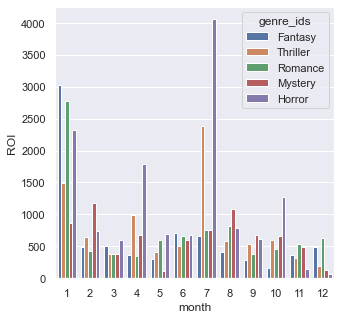

In [79]:
# set plot style: grey grid in the background:
sns.set(style="darkgrid")

# Set the figure size
plt.figure(figsize=(5, 5))

# grouped barplot
sns.barplot(x="month", y="ROI", hue="genre_ids", data=month_genre_roi_title , ci=None);


In [39]:
month_genre_roi_title

,genre_ids,title,ROI,month
195,Comedy,Get Out,8628.172320,2
195,Animation,Get Out,8628.172320,2
196,Mystery,Get Out,8628.172320,2
196,Thriller,Get Out,8628.172320,2
196,Horror,Get Out,8628.172320,2
...,...,...,...,...
1663,Action,Proud Mary,141.927257,1
1663,Crime,Proud Mary,141.927257,1
1664,Action,Bilal: A New Breed of Hero,3.798573,2
1664,Adventure,Bilal: A New Breed of Hero,3.798573,2


# What is the correlation between runtime minutes and popularity? 

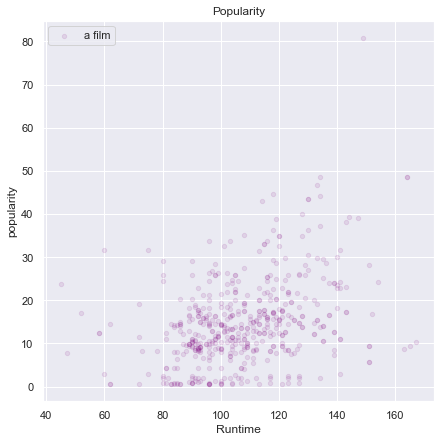

In [57]:
fig, ax = plt.subplots(figsize=(7, 7))

runtime = less_columns['runtime_minutes']
popularity = less_columns['popularity']

ax.scatter(runtime, popularity,
            c='purple',
            alpha=0.10,
            s=75,
            marker='.') #ax.scatter will ask for the x axis value, then the y axis value

ax.set_title("Popularity")

# Set labels for X and Y axes
ax.set_xlabel("Runtime")
ax.set_ylabel("popularity")

# Set text of legend
ax.legend(["a film"]);

# This is where we analyze directors

In [83]:
#make a dataframe with director names that had the tconst as unique identifier so that we can merge on tconst
title_principal_directors=title_principal[title_principal['category'] == 'director'] #created a new dataframe that filtered out only the directors from title_principal
nconst_to_name=dict(zip(list(name_basics['nconst']),list(name_basics['primary_name']))) #the dictionary where the keys are the nconsts and values are the primary names from name_basics
title_principal_directors['director_name']=title_principal_directors['nconst'].map(nconst_to_name) #creates a new column with the name of the director
    #third, merge title_master and title_principal_directors
master_directors=title_master.merge(title_principal_directors, on='tconst', how='inner' )

<ipython-input-83-31781bb5c6ed>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  title_principal_directors['director_name']=title_principal_directors['nconst'].map(nconst_to_name) #creates a new column with the name of the director


In [84]:
master_directors

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,ordering,nconst,category,job,characters,director_name
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,5,nm0712540,director,NaN,NaN,Harnam Singh Rawail
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43,5,nm0002411,director,NaN,NaN,Mani Kaul
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,5,nm0000080,director,NaN,NaN,Orson Welles
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13,5,nm0611531,director,NaN,NaN,Hrishikesh Mukherjee
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119,5,nm0749914,director,original director,NaN,Raoul Ruiz
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77447,tt9913056,Swarm Season,Swarm Season,2019,86.0,Documentary,6.2,5,1,nm1502645,director,NaN,NaN,Sarah Christman
77448,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6,5,nm0812850,director,NaN,NaN,Giancarlo Soldi
77449,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8,1,nm5300859,director,NaN,NaN,Chris Jordan
77450,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,NaN,6.6,5,5,nm1716653,director,NaN,NaN,Laura Jou


# This is where we analyze movie studios

In [22]:
#let's sort by studio---FILL IN LATER WITH TEIGEN'S WORK
less_columns.groupby(['studio'], sort = True).max()

,genre_ids,original_language,popularity,title,vote_average,vote_count,runtime_minutes,averagerating,numvotes,release_date_y,production_budget,domestic_gross,worldwide_gross,total_gross,ROI
studio,,,,,,,,,,,,,,,
A24,"[Horror, Mystery, Thriller]",en,26.185,The Florida Project,7.4,3866,163.0,7.6,177677,"Sep 30, 2016",10000000,48958273,78610769,127569042,4364.580000
Affirm,[History],en,12.005,"Paul, Apostle of Christ",7.1,98,108.0,6.7,5662,"Mar 23, 2018",5000000,17547999,25529498,43077497,861.549940
Amazon,"[Horror, Fantasy]",en,16.925,Suspiria,7.0,752,152.0,6.8,37360,"Oct 26, 2018",20000000,2483472,7034615,9518087,47.590435
Annapurna,"[Thriller, Science Fiction, Action, Adventure]",en,20.125,Vice,7.2,1213,132.0,7.2,72855,"Dec 25, 2018",60000000,47836282,70883171,118719453,289.791167
BBC,"[Music, Documentary]",fr,0.600,They Will Have to Kill Us First,5.0,1,100.0,7.3,112,"Mar 4, 2016",600000,0,7943,7943,1.323833
BG,"[Thriller, Horror, Mystery]",en,11.787,Wish Upon,6.6,2005,127.0,7.0,72359,"Jun 24, 2016",47500000,15436808,23477345,37778850,314.823750
BH Tilt,"[Horror, Thriller]",en,21.413,Upgrade,7.4,1326,100.0,8.8,104978,"May 13, 2016",5000000,11977130,16553285,28530415,2530.133300
BST,"[Horror, Thriller]",en,16.316,Unsane,7.1,1627,141.0,7.4,105966,"Sep 30, 2016",30000000,27778642,44264271,72042913,1462.331667
BV,"[Fantasy, Family, Comedy]",en,80.773,Zootopia,8.3,14000,149.0,8.5,670926,"Sep 23, 2016",300000000,700059566,2048134200,2726949682,1024.158895


In [ ]:
#here we must merge the Box Office Mojo data with the TMDB and IMDB dataframes, and again we are only interested in 
#the movies that are shared between those dataframes so we are doing an inner merge
tmdb_and_imdb_and_bomo = tmdb_and_imdb.merge(movie_studios, how = 'inner')